# First Sight to Data

In [3]:
import seaborn as sns
planets = sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


***What is the story of dataset?***          
This is the most important question for data analysis. You have to know that how data collected, how vatiables named etc.                                  
For this dataset; published by NASA about galaxy explores.

In [4]:
# Firstly you need to copy your dataset for protect your main dataset.

df = planets.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
method            1035 non-null object
number            1035 non-null int64
orbital_period    992 non-null float64
mass              513 non-null float64
distance          808 non-null float64
year              1035 non-null int64
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [6]:
#object data type means categorical variable

In [7]:
import pandas as pd
df.method = pd.Categorical(df.method)
#Changing "method" variables' type

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
method            1035 non-null category
number            1035 non-null int64
orbital_period    992 non-null float64
mass              513 non-null float64
distance          808 non-null float64
year              1035 non-null int64
dtypes: category(1), float64(3), int64(2)
memory usage: 42.0 KB


In [9]:
df.describe().T

#NaN values ignored, categorical variables excluded. !!!

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [10]:
#Is there any missing value?
df.isnull().values.any()

True

In [11]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [12]:
#You can fill the missing values with zero
#df["variable name"].fillna(0, inplace=True)

### Reaching to Categorical Variables

In [13]:
cat_df = df.select_dtypes(include=["category"])

In [14]:
cat_df.head() # only one categorical variable

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity


In [15]:
cat_df.method.unique()  #class names

[Radial Velocity, Imaging, Eclipse Timing Variations, Transit, Astrometry, Transit Timing Variations, Orbital Brightness Modulation, Microlensing, Pulsar Timing, Pulsation Timing Variations]
Categories (10, object): [Radial Velocity, Imaging, Eclipse Timing Variations, Transit, ..., Orbital Brightness Modulation, Microlensing, Pulsar Timing, Pulsation Timing Variations]

In [16]:
cat_df["method"].value_counts().count()  #class count

10

In [17]:
cat_df["method"].value_counts()  # class freq information

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

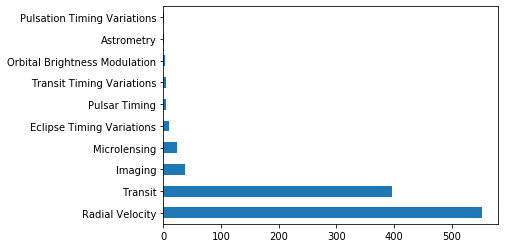

In [18]:
df["method"].value_counts().plot.barh();

In [19]:
df_num = df.select_dtypes(include = ["float64","int64"])

In [20]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [21]:
df_num["distance"].describe()

count     808.000000
mean      264.069282
std       733.116493
min         1.350000
25%        32.560000
50%        55.250000
75%       178.500000
max      8500.000000
Name: distance, dtype: float64

In [22]:
print("********** Distance Variable Stats ************")
print("Mean: ",str(df_num["distance"].mean()))
print("Count: ",str(df_num["distance"].count()))
print("Max Value: ",str(df_num["distance"].max()))
print("Min Value: ",str(df_num["distance"].min()))
print("Median: ",str(df_num["distance"].median()))
print("Std: ",str(df_num["distance"].std()))

********** Distance Variable Stats ************
Mean:  264.06928217821786
Count:  808
Max Value:  8500.0
Min Value:  1.35
Median:  55.25
Std:  733.1164929404422


### Distrubution Graphs

#### Barplot
Using for categorical variable visualization

In [1]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
df1 = diamonds.copy()
df1.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [3]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [4]:
df1["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [5]:
df1["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [6]:
#In this dataset type of categorical variables is not ordinal. We need to adjust
from pandas.api.types import CategoricalDtype

In [7]:
df1.cut = df1.cut.astype(CategoricalDtype(ordered = True))

In [8]:
df1.dtypes

carat       float64
cut        category
color        object
clarity      object
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [9]:
df1.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): [Fair < Good < Ideal < Premium < Very Good]

As you can see [Fair < Good < Ideal < Premium < Very Good] isn't True.               
Its should be [Fair < Good < Very Good < Premium < Ideal]

In [10]:
cut_cat = ["Fair","Good","Very Good","Premium","Ideal"]

In [11]:
df1.cut = df1.cut.astype(CategoricalDtype(categories = cut_cat,ordered = True))

In [12]:
df1.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): [Fair < Good < Very Good < Premium < Ideal]

In [13]:
# Let's do this to all categorical variables
df1.color.head(1)

0    E
Name: color, dtype: object

In [14]:
df1.color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [15]:
df1.color = df1.color.astype(CategoricalDtype(ordered=True))

In [16]:
df1.color.head()

0    E
1    E
2    E
3    I
4    J
Name: color, dtype: category
Categories (7, object): [D < E < F < G < H < I < J]

In [17]:
color_cat = ["J","I","H","G","F","E","D"]

In [18]:
df1.color = df1.color.astype(CategoricalDtype(ordered=True,categories=color_cat))

In [19]:
df1.color.head(1)

0    E
Name: color, dtype: category
Categories (7, object): [J < I < H < G < F < E < D]

In [20]:
df1.clarity.value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [21]:
df1.clarity = df1.clarity.astype(CategoricalDtype(ordered=True))

In [22]:
df1.clarity.head(1)

0    SI2
Name: clarity, dtype: category
Categories (8, object): [I1 < IF < SI1 < SI2 < VS1 < VS2 < VVS1 < VVS2]

In [23]:
clarity_cat = ["I1","SI2","SI1","VS2","VS1","VVS2","VVS1","IF"]

In [24]:
df1.clarity = df1.clarity.astype(CategoricalDtype(ordered=True,categories=clarity_cat))

In [25]:
df1.clarity.head(1)

0    SI2
Name: clarity, dtype: category
Categories (8, object): [I1 < SI2 < SI1 < VS2 < VS1 < VVS2 < VVS1 < IF]

### Creating Bar Plot

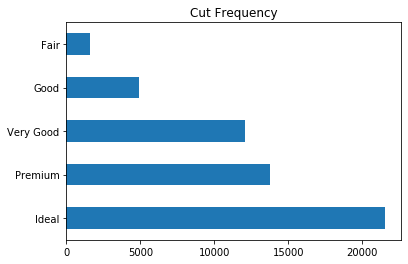

In [26]:
#With pandas
df1["cut"].value_counts().plot.barh().set_title("Cut Frequency");

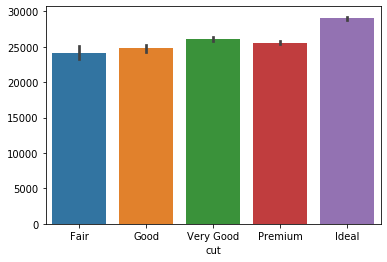

In [27]:
#With seaborn
sns.barplot(x = "cut",y=df1.cut.index,data=df1);

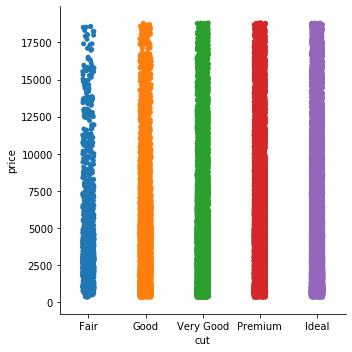

In [28]:
sns.catplot(x="cut",y="price",data=df1);

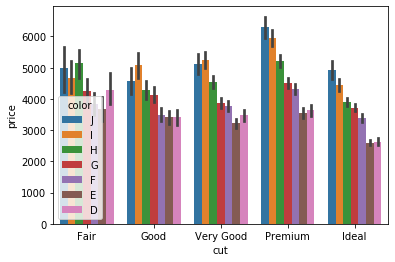

In [82]:
sns.barplot(x="cut",y="price",data=df1,hue="color");

In [29]:
df1.groupby(["cut","color"])["price"].mean()

cut        color
Fair       J        4975.655462
           I        4685.445714
           H        5135.683168
           G        4239.254777
           F        3827.003205
           E        3682.312500
           D        4291.061350
Good       J        4574.172638
           I        5078.532567
           H        4276.254986
           G        4123.482204
           F        3495.750275
           E        3423.644159
           D        3405.382175
Very Good  J        5103.513274
           I        5255.879568
           H        4535.390351
           G        3872.753806
           F        3778.820240
           E        3214.652083
           D        3470.467284
Premium    J        6294.591584
           I        5946.180672
           H        5216.706780
           G        4500.742134
           F        4324.890176
           E        3538.914420
           D        3631.292576
Ideal      J        4918.186384
           I        4451.970377
           H        388

### Histogram and Density
Using for numerical variables distrubition

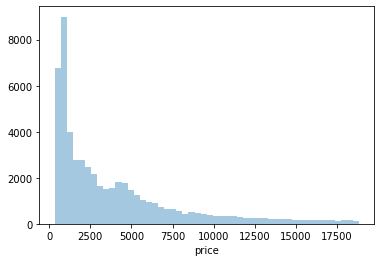

In [30]:
sns.distplot(df1.price, kde = False);

In [96]:
?sns.distplot  

Signature:
sns.distplot  (
    a,
    bins=None,
    hist=True,
    kde=True,
    rug=False,
    fit=None,
    hist_kws=None,
    kde_kws=None,
    rug_kws=None,
    fit_kws=None,
    color=None,
    vertical=False,
    norm_hist=False,
    axlabel=None,
    label=None,
    ax=None,
)
Docstring:
Flexibly plot a univariate distribution of observations.

This function combines the matplotlib ``hist`` function (with automatic
calculation of a good default bin size) with the seaborn :func:`kdeplot`
and :func:`rugplot` functions. It can also fit ``scipy.stats``
distributions and plot the estimated PDF over the data.

Parameters
----------

a : Series, 1d-array, or list.
    Observed data. If this is a Series object with a ``name`` attribute,
    the name will be used to label the data axis.
bins : argument for matplotlib hist(), or None, optional
    Specification of hist bins. If unspecified, as reference rule is used
    that tries to find a useful default.
hist : bool, optional
    Wheth

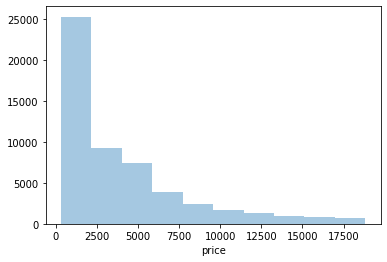

In [31]:
sns.distplot(df1.price, kde = False, bins = 10); #bins is very important

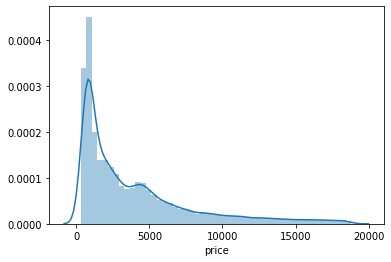

In [56]:
sns.distplot(df1.price);

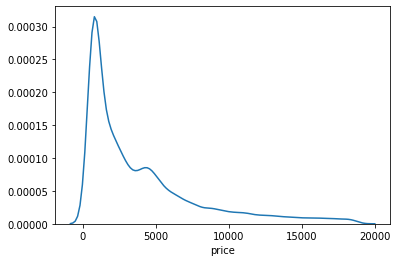

In [57]:
sns.distplot(df1.price,hist=False);

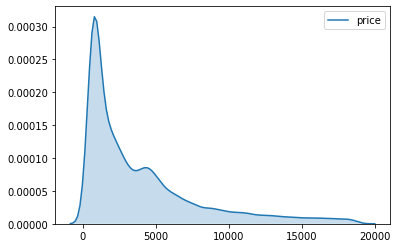

In [32]:
sns.kdeplot(df1.price,shade=True);

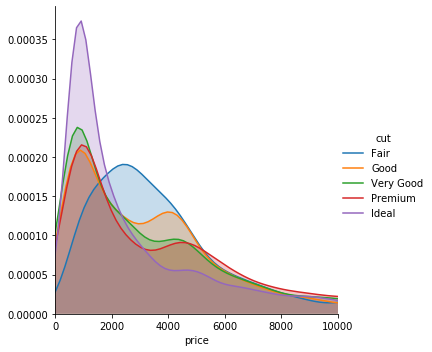

In [35]:
(sns
 .FacetGrid(df1,
              hue = "cut",
              height = 5,
              xlim = (0,10000))
 .map(sns.kdeplot,"price",shade = True)
 .add_legend()
);

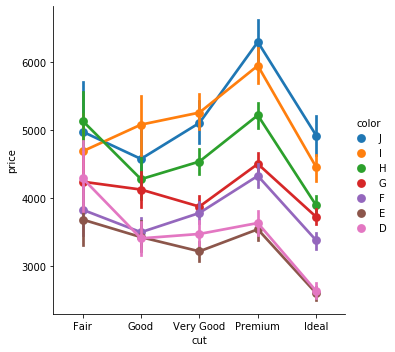

In [36]:
sns.catplot(x="cut",y="price",hue="color",kind="point",data=df1);

### Boxplot

In [37]:
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [49]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [43]:
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [44]:
df["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [45]:
df["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [46]:
df["smoker"].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [47]:
df["time"].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

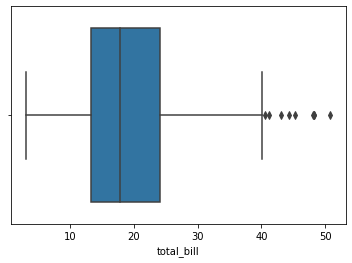

In [50]:
sns.boxplot(x=df["total_bill"]);

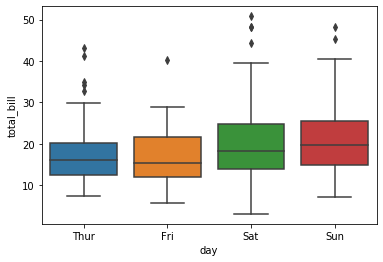

In [55]:
# Question: Which days do we earn the most?

sns.boxplot(x="day",y="total_bill",data=df);

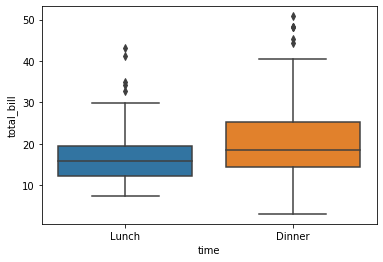

In [59]:
# Question: Day or night we earn the most?

sns.boxplot(x="time",y="total_bill",data=df);

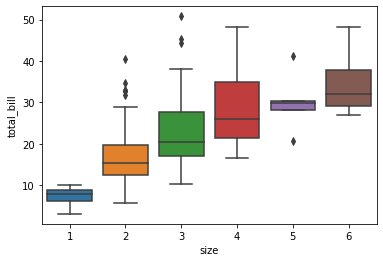

In [61]:
#Question: Size - Bill
sns.boxplot(x="size",y="total_bill",data=df);

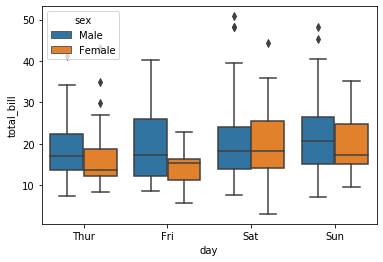

In [62]:
sns.boxplot(x="day",y="total_bill",data=df,hue="sex");

### Violin Graph

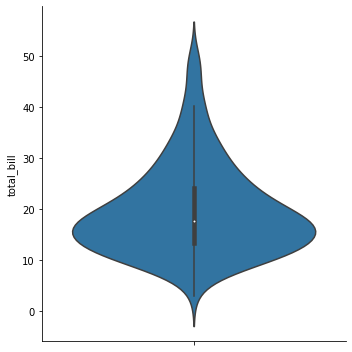

In [67]:
sns.catplot(y="total_bill",kind="violin",data=df);

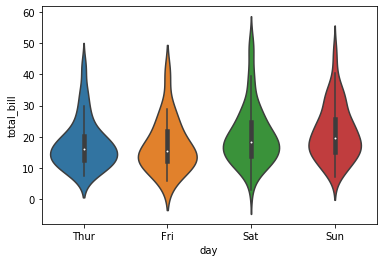

In [65]:
sns.violinplot(x="day",y="total_bill",data=df);

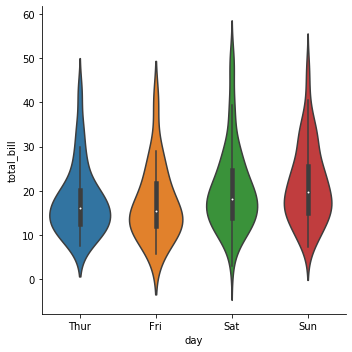

In [68]:
sns.catplot(x="day",y="total_bill",kind="violin",data=df);

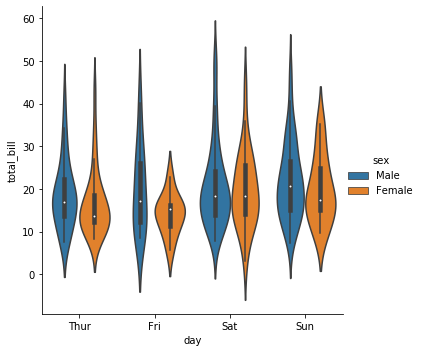

In [73]:
sns.catplot(x="day",y="total_bill",kind="violin",data=df,hue="sex");

### Correlation Graphs

**Scatterplot**                                         
Defines relationship between 2 numeric variable

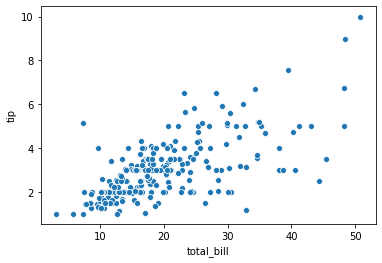

In [75]:
sns.scatterplot(x="total_bill",y="tip",data=df);

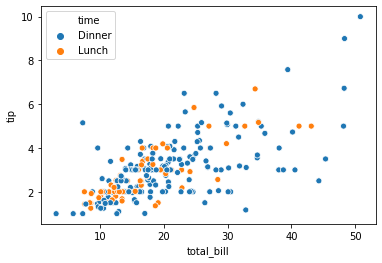

In [77]:
sns.scatterplot(x="total_bill",y="tip",hue="time",data=df);

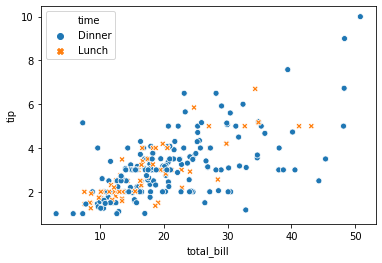

In [81]:
sns.scatterplot(x="total_bill",y="tip",hue="time",style="time",data=df);

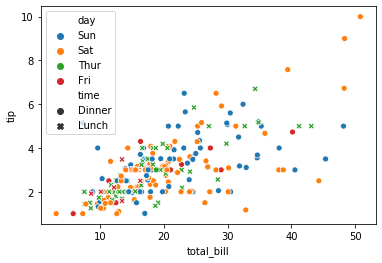

In [82]:
sns.scatterplot(x="total_bill",y="tip",hue="day",style="time",data=df);

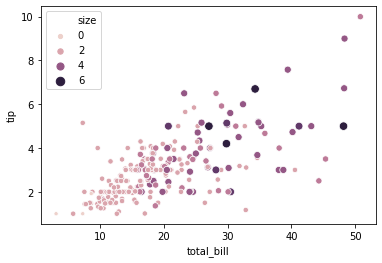

In [84]:
sns.scatterplot(x="total_bill",y="tip",size="size",hue="size",data=df);

### Linear Relationship

In [85]:
import matplotlib.pyplot as plt

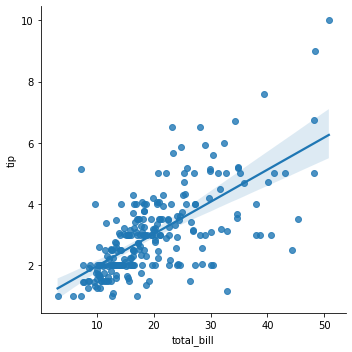

In [87]:
sns.lmplot(x="total_bill",y="tip",data=df);

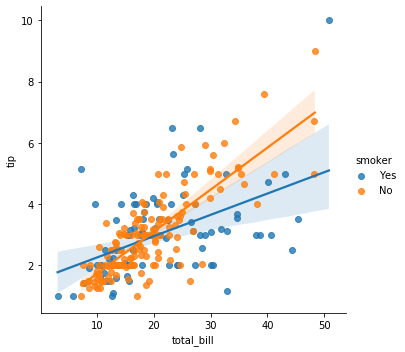

In [90]:
sns.lmplot(x="total_bill",y="tip",hue="smoker",data=df);

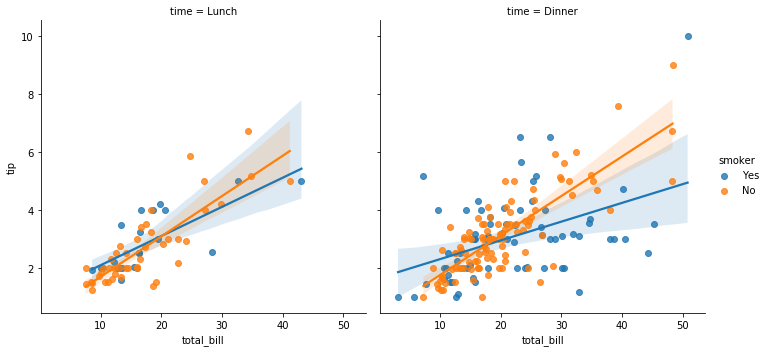

In [91]:
sns.lmplot(x="total_bill",y="tip",hue="smoker",col="time",data=df);

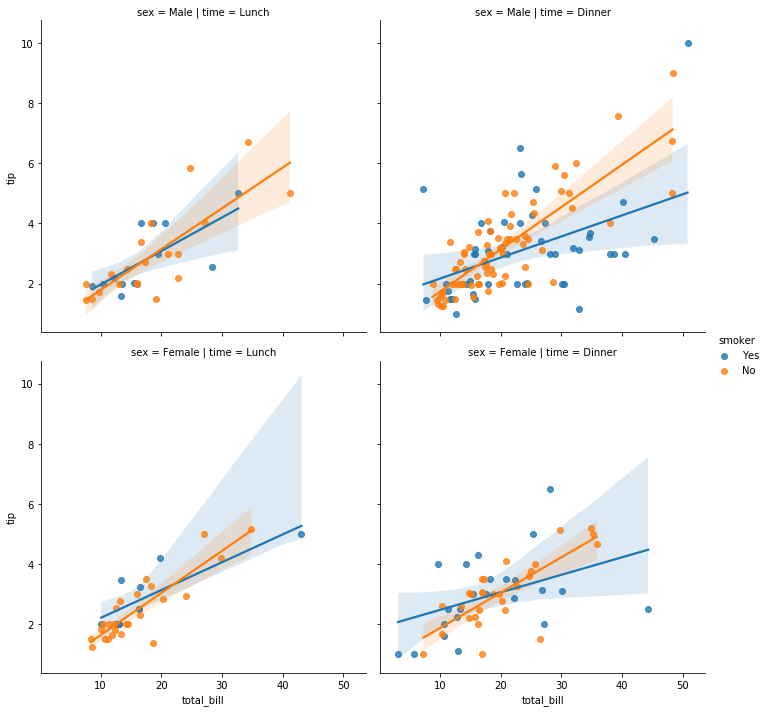

In [92]:
sns.lmplot(x="total_bill",y="tip",hue="smoker",col="time",row = "sex",data=df);

### ScatterPlot Matrix

In [93]:
iris = sns.load_dataset("iris")
df = iris.copy()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [94]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [95]:
df.shape

(150, 5)

In [99]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

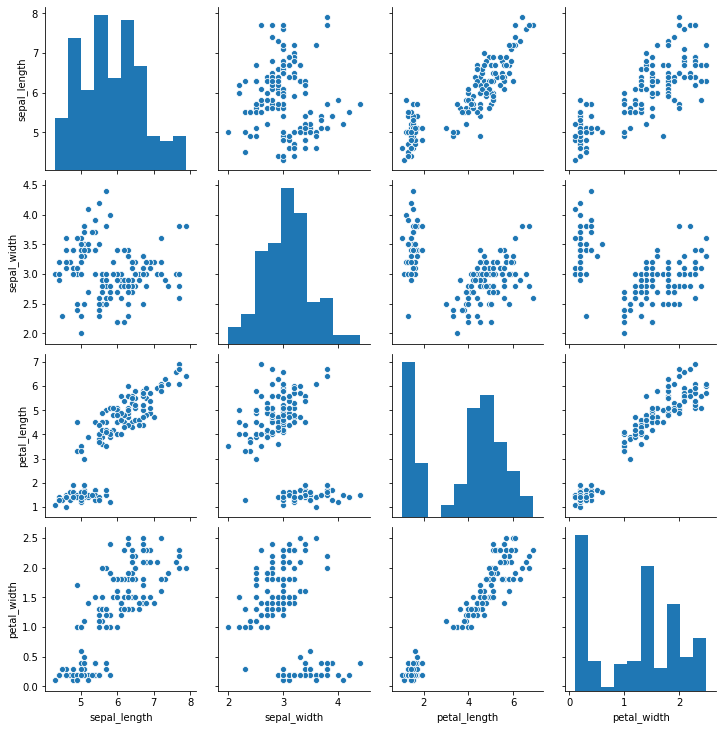

In [101]:
sns.pairplot(df);

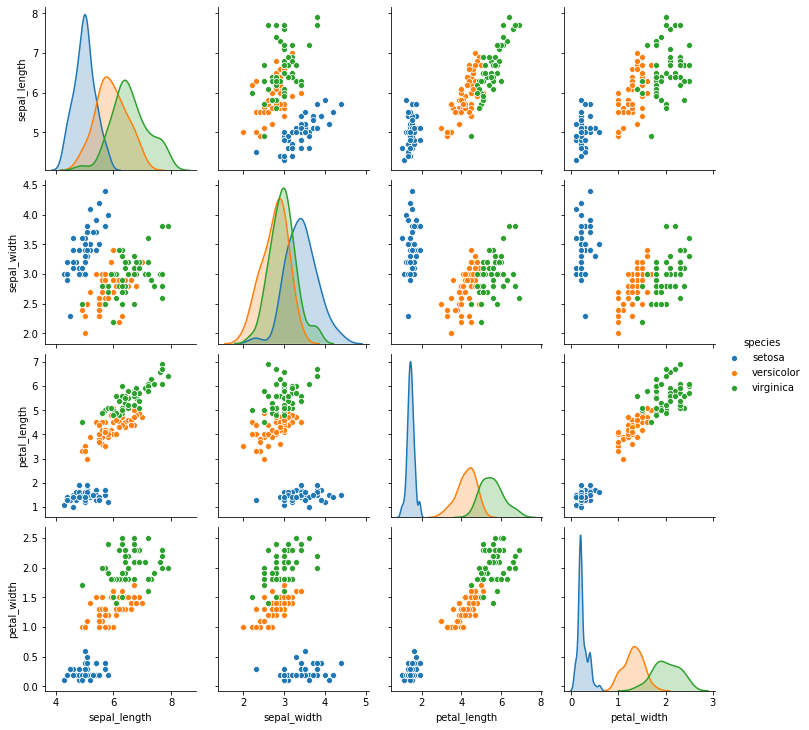

In [102]:
sns.pairplot(df,hue = "species");

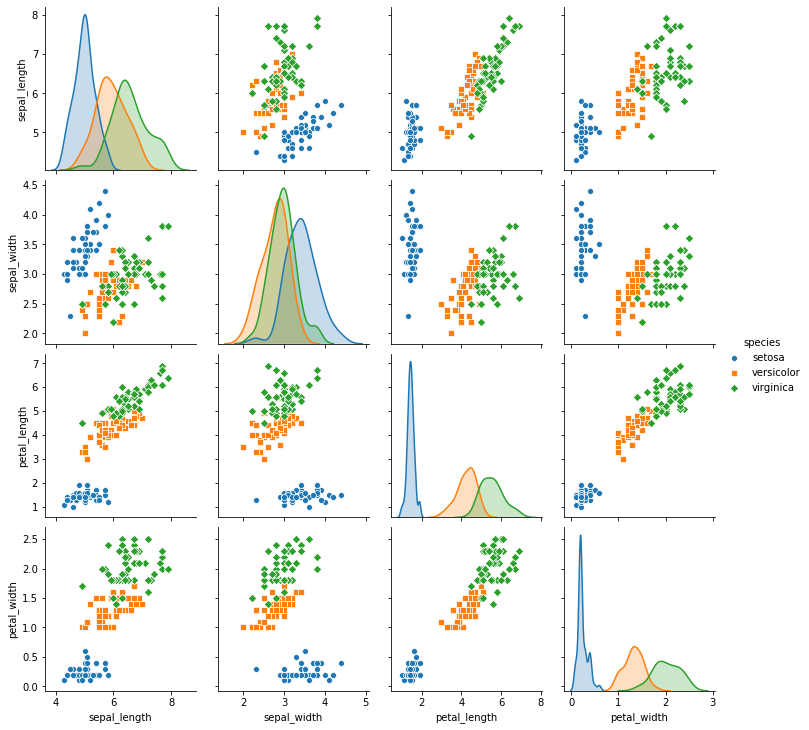

In [103]:
sns.pairplot(df,hue = "species",markers=["o","s","D"]);

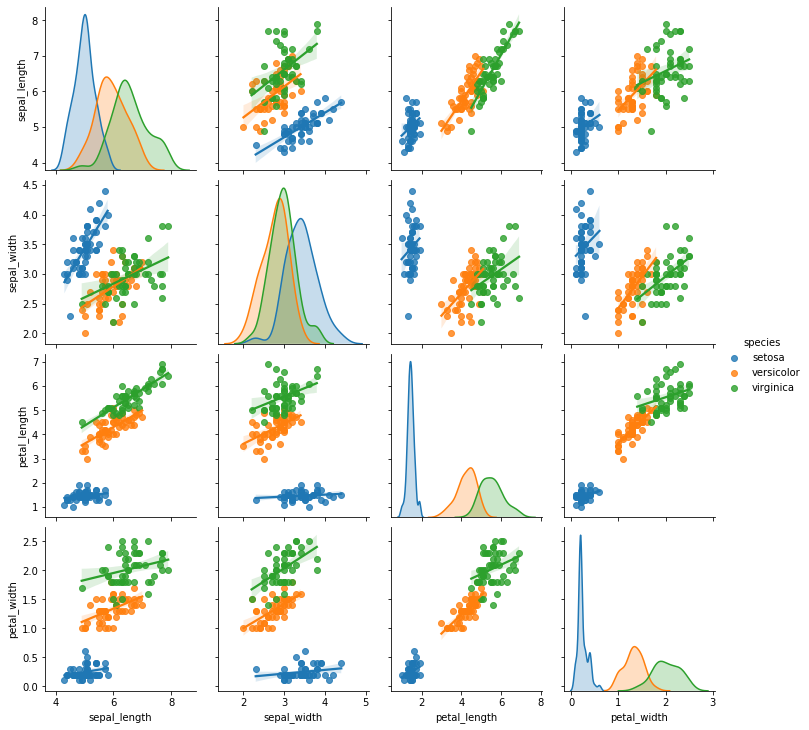

In [105]:
sns.pairplot(df, kind = "reg",hue="species");

### Heat Map

Using in time series

In [107]:
flights = sns.load_dataset("flights")
df = flights.copy()
df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [108]:
df.shape

(144, 3)

In [110]:
df["passengers"].describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: passengers, dtype: float64

In [111]:
df = df.pivot("month","year","passengers")

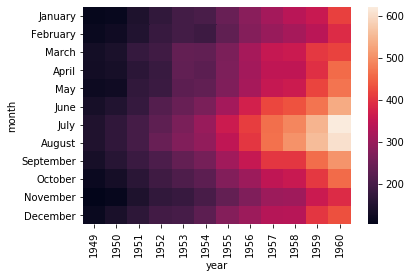

In [113]:
sns.heatmap(df);

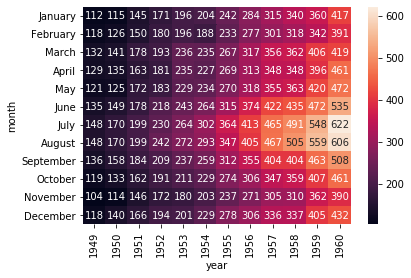

In [117]:
sns.heatmap(df,annot=True,fmt="d");

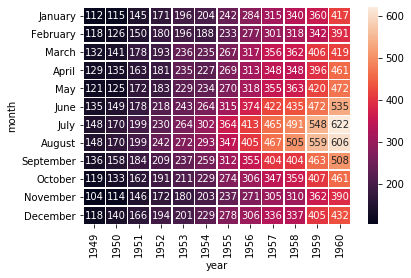

In [121]:
sns.heatmap(df,annot=True,fmt="d",linewidth=0.5);

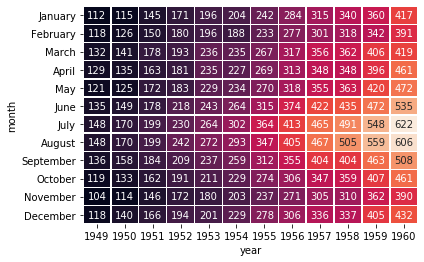

In [122]:
sns.heatmap(df,annot=True,fmt="d",linewidth=0.5,cbar=False);

### Line Plot

Using IoT, depends time variables

In [123]:
fmri = sns.load_dataset("fmri")
df = fmri.copy()
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [124]:
df.shape

(1064, 5)

In [125]:
df.isnull().sum()

subject      0
timepoint    0
event        0
region       0
signal       0
dtype: int64

In [126]:
df["timepoint"].describe()

count    1064.000000
mean        9.000000
std         5.479801
min         0.000000
25%         4.000000
50%         9.000000
75%        14.000000
max        18.000000
Name: timepoint, dtype: float64

In [127]:
df["signal"].describe()

count    1064.000000
mean        0.003540
std         0.093930
min        -0.255486
25%        -0.046070
50%        -0.013653
75%         0.024293
max         0.564985
Name: signal, dtype: float64

In [128]:
df.groupby("timepoint")["signal"].count()

timepoint
0     56
1     56
2     56
3     56
4     56
5     56
6     56
7     56
8     56
9     56
10    56
11    56
12    56
13    56
14    56
15    56
16    56
17    56
18    56
Name: signal, dtype: int64

In [130]:
df.groupby("signal").count()

,subject,timepoint,event,region
signal,,,,
-0.255486,1,1,1,1
-0.238474,1,1,1,1
-0.224351,1,1,1,1
-0.181241,1,1,1,1
-0.178510,1,1,1,1
...,...,...,...,...
0.455575,1,1,1,1
0.460896,1,1,1,1
0.476055,1,1,1,1


In [131]:
df.groupby("timepoint")["signal"].describe()

,count,mean,std,min,25%,50%,75%,max
timepoint,,,,,,,,
0,56.0,-0.016662,0.028326,-0.064454,-0.039169,-0.018382,0.003539,0.074399
1,56.0,-0.025002,0.030641,-0.082174,-0.046299,-0.024533,-0.005388,0.063558
2,56.0,-0.012873,0.035440,-0.110565,-0.034944,-0.013183,0.009318,0.077277
3,56.0,0.034446,0.058260,-0.089708,-0.001157,0.028430,0.061840,0.185581
4,56.0,0.098194,0.092838,-0.046347,0.030912,0.070166,0.144911,0.346775
5,56.0,0.137725,0.123353,-0.017946,0.042762,0.096535,0.211638,0.476055
6,56.0,0.127515,0.137332,-0.054405,0.022409,0.068850,0.218919,0.564985
7,56.0,0.075660,0.129704,-0.108222,-0.016252,0.032486,0.144781,0.494787
8,56.0,0.013420,0.104216,-0.181241,-0.049453,-0.012834,0.030396,0.337143


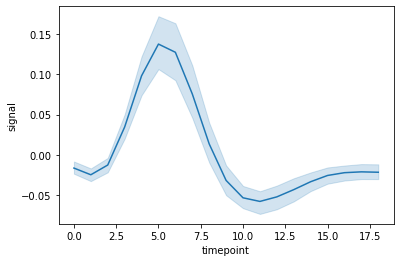

In [134]:
sns.lineplot(x="timepoint",y="signal",data=df);

#blue line = avg, light blue area = std

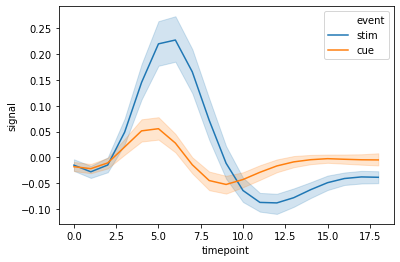

In [136]:
sns.lineplot(x="timepoint",y="signal",data=df,hue="event");

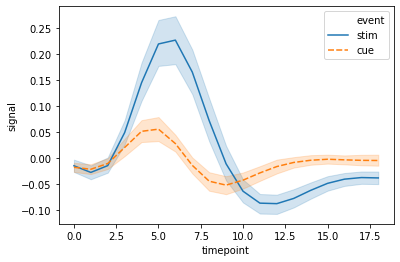

In [137]:
sns.lineplot(x="timepoint",y="signal",data=df,hue="event",style="event");

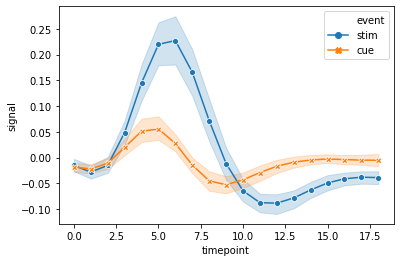

In [139]:
sns.lineplot(x="timepoint",
             y="signal",
             data=df,
             hue="event",
             style="event",
            markers=True,
            dashes=False);

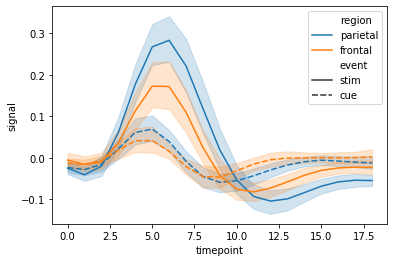

In [141]:
sns.lineplot(x="timepoint",
             y="signal",
             data=df,
             hue="region",
             style="event",
            );

### Simple Time Series Graph

In [142]:
!pip install pandas_datareader

In [143]:
import pandas_datareader as pr

In [144]:
df = pr.get_data_yahoo("AAPL", start = "2016-01-01",end="2019-08-25")

In [145]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,26.342501,25.500000,25.652500,26.337500,270597600.0,24.400942
2016-01-05,26.462500,25.602501,26.437500,25.677500,223164000.0,23.789471
2016-01-06,25.592501,24.967501,25.139999,25.174999,273829600.0,23.323915
2016-01-07,25.032499,24.107500,24.670000,24.112499,324377600.0,22.339539
2016-01-08,24.777500,24.190001,24.637501,24.240000,283192000.0,22.457672


In [146]:
df.shape

(917, 6)

In [147]:
close = df["Close"]

In [149]:
close.head()

Date
2016-01-04    26.337500
2016-01-05    25.677500
2016-01-06    25.174999
2016-01-07    24.112499
2016-01-08    24.240000
Name: Close, dtype: float64

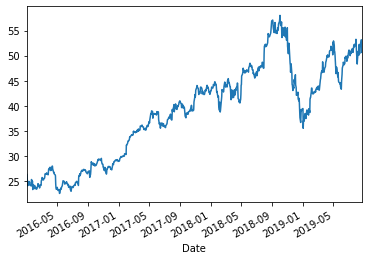

In [150]:
close.plot();

In [152]:
# If index isn't datetimeindex you have to adjust
import pandas as pd
close.index = pd.DatetimeIndex(close.index)

In [153]:
close.index

DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
               '2016-01-14', '2016-01-15',
               ...
               '2019-08-12', '2019-08-13', '2019-08-14', '2019-08-15',
               '2019-08-16', '2019-08-19', '2019-08-20', '2019-08-21',
               '2019-08-22', '2019-08-23'],
              dtype='datetime64[ns]', name='Date', length=917, freq=None)